# Bike sharing data set EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("../data/bike_sharing.csv", header=0)

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,NaN
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,NaN,1.0


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10869.000000,10865.000000,10864.000000,10869.000000,10864.000000,10865.000000,10867.000000,10862.000000,10870.000000,10863.000000,10862.000000
mean,2.507038,0.028624,0.681241,1.418530,20.224427,23.648999,61.883408,12.802173,36.041030,155.610145,191.494292
std,1.116210,0.166755,0.466017,0.633902,7.791693,8.471655,19.238889,8.165269,49.987038,151.128237,181.176641
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.dtypes

datetime       object
season        float64
holiday       float64
workingday    float64
weather       float64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual        float64
registered    float64
count         float64
dtype: object

In [6]:
def create_random_nan_masked_df(df):
    return df.mask(np.random.random(df.shape)<0.002)

In [7]:
def compute_rental_station_data(df):
    result = []
    for rental_station_id in range(1, 14):
        num_samples = np.random.randint(100, 2000)
        result.extend([rental_station_id] * num_samples)
    result = np.array(result).flatten()
    np.random.shuffle(result)
    result = result[:len(df)]
    return result

In [8]:
df["rental_station_id"] = compute_rental_station_data(df)

# Questions:
1. Is any data missing or corrupted? How would you deal with this?
2. What is the most popular time to rent out bikes?
3. What is the most popular bike rental station?
4. Your manager wants to get a report of the weekly bike rental numbers over the whole data set. How do you proceed?

## Q1: Missing or corrupted data?

In [10]:
df.isnull().values.any()

True

In [12]:
df[df.isna().any(axis=1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,rental_station_id
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,NaN,8
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,0.0,NaN,1.0,1
9,2011-01-01 09:00:00,1.0,0.0,0.0,1.0,13.12,17.425,76.0,NaN,8.0,6.0,14.0,8
34,2011-01-02 11:00:00,1.0,0.0,0.0,2.0,NaN,16.665,71.0,16.9979,16.0,54.0,70.0,4
35,2011-01-02 12:00:00,1.0,0.0,0.0,2.0,14.76,16.665,66.0,19.9995,20.0,NaN,93.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,2012-12-17 04:00:00,4.0,0.0,1.0,3.0,14.76,18.940,100.0,NaN,2.0,3.0,5.0,8
10823,NaN,4.0,0.0,1.0,2.0,16.40,20.455,87.0,0.0000,11.0,271.0,282.0,5
10845,2012-12-18 07:00:00,4.0,0.0,1.0,1.0,14.76,17.425,NaN,8.9981,4.0,351.0,355.0,2
10869,2012-12-19 07:00:00,4.0,0.0,1.0,NaN,10.66,13.635,75.0,8.9981,3.0,360.0,363.0,13


In [13]:
# drop missing columns if you like (only ok for this exercise!)
df.dropna(axis=0, inplace=True)

### Dealing with missing / NaN values
Looking at the dataframe above, we can see there are some NaN values. The question now is: how do we deal with these?
For some columns we could actually fill in the missing values:
- for casual, registered and count we could calculate a missing value if we have the other two
- for season we could look at datetime and determine it ourselves
- same goes for working day and holiday (if we know the location of reference for the data set)
- we could also check out weather information for the day to figure out the temp, atemp, humidity and windspeed
- missing datetimes could be added by looking at the sampling rate of the data (hourly)

## Q2: What is the most popular time to rent out bikes?

In [14]:
# cast "datetime" column to actual datetime type 
df["datetime"] = pd.to_datetime(df["datetime"])

In [15]:
# add column for hour (of day)
df["hour"] = df["datetime"].dt.hour

In [16]:
# group by hour and sum the rental counts, sort descending
df.groupby(["hour"]).agg({"count": "sum"}).sort_values("count", ascending=False)

,count
hour,
17,209997.0
18,188996.0
8,162165.0
16,142412.0
19,141809.0
12,115618.0
13,115164.0
15,113069.0
14,108534.0


### Q2 - Answer 1: Most bikes are rented out in the late afternoon / early evening (4PM-7PM), as well as around 8 AM
One could go further now and not only look at the time of day, but at other time features: season, holiday, workingday...

#### Season

In [17]:
df.groupby("season").agg({"count": "sum"}).sort_values("count", ascending=False)

,count
season,
3.0,624633.0
2.0,576119.0
4.0,528576.0
1.0,305445.0


#### Q2 - Answer 2: The most popular season to rent out bikes is fall.

#### Holiday or not

In [18]:
day_type_rentals = df.groupby("holiday").agg({"count": "sum"}).sort_values("count", ascending=False)

In [19]:
day_type_rentals

,count
holiday,
0.0,1979738.0
1.0,55035.0


People rent way more bikes on holidays then on workdays. But careful: there are probably more non-holidays than holidays ;)

In [20]:
df["holiday"].value_counts()

0.0    10337
1.0      300
Name: holiday, dtype: int64

In [21]:
rentals_per_day_type = day_type_rentals["count"] / df["holiday"].value_counts()

In [22]:
rentals_per_day_type

holiday
0.0    191.51959
1.0    183.45000
dtype: float64

#### Q2 - Answer 3:  When we look at the number of rentals per day for holidays and non-holidays, it still looks like non-holidays have more rentals. However, the numbers seem not so far apart now.

#### Working day

In [23]:
workingday_type_rentals = df.groupby("workingday").agg({"count": "sum"}).sort_values("count", ascending=False)
workingday_type_rentals

,count
workingday,
1.0,1398583.0
0.0,636190.0


In [24]:
df["workingday"].value_counts()

1.0    7249
0.0    3388
Name: workingday, dtype: int64

In [25]:
rentals_per_workingday_type = workingday_type_rentals["count"] / df["workingday"].value_counts()
rentals_per_workingday_type

workingday
1.0    192.934612
0.0    187.777450
dtype: float64

#### Q2 - Answer 4: There are slightly more rentals on working days than non-working days.

## Q3: What is the most popular bike rental station?

In [26]:
df["rental_station_id"].value_counts()

3     1511
6     1502
4     1238
2     1183
12     976
9      822
8      810
13     666
1      657
7      550
5      415
11     178
10     129
Name: rental_station_id, dtype: int64

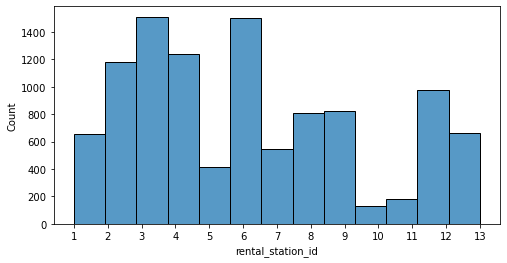

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=df, x="rental_station_id", bins=13)
ax.set_xticks(range(1, 14));

#### Q3 Answer: The most popular bike rental station has id=3, closely followed by station with id=6.

### Q4: Your manager wants to get a report of the weekly bike rental numbers over the whole data set. How do you proceed?

In [43]:
df_ = df.copy()
df_["datetime"] = pd.to_datetime(df_["datetime"])
df_reindexed = df_.set_index("datetime")

In [44]:
df_reindexed.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,NaN
2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0


In [45]:
df_resampled = df_reindexed.resample('W').sum()

In [47]:
df_resampled.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-02,47.0,0.0,0.0,83.0,666.66,826.485,3535.0,640.9957,462.0,1250.0,1770.0
2011-01-09,162.0,0.0,114.0,201.0,1256.24,1558.415,7992.0,2310.0997,668.0,8740.0,9408.0


<AxesSubplot:xlabel='datetime', ylabel='count'>

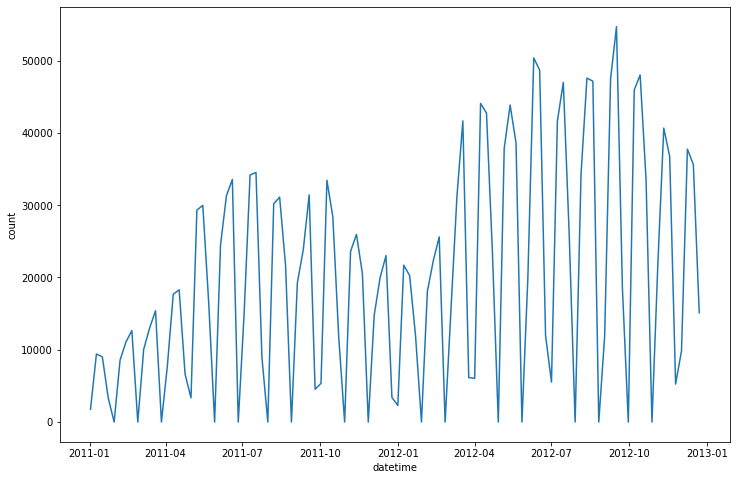

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=df_resampled, x="datetime", y="count")

<AxesSubplot:xlabel='datetime', ylabel='count'>

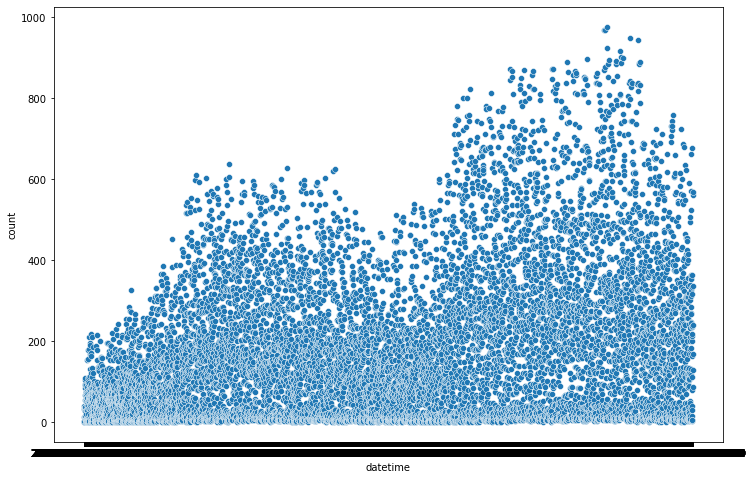

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="datetime", y="count")

In [171]:
train_masked.to_csv("../data/bike_sharing.csv", header=True, index=False)